Fetching data for TCS.BSE...
Fetching data for HDFCBANK.BSE...
Fetching data for INFY.BSE...
Fetching data for ICICIBANK.BSE...
Fetching data for SBIN.BSE...

Most Recent Closing Prices:
              TCS.BSE  HDFCBANK.BSE  INFY.BSE  ICICIBANK.BSE  SBIN.BSE
2025-04-02  3545.0000       1797.40   1549.85        1331.45    775.85
2025-04-03  3403.8999       1793.70   1497.00        1329.00    779.20
2025-04-04  3299.4500       1817.00   1452.30        1334.95    767.80
2025-04-07  3276.6001       1758.15   1397.80        1287.65    746.75
2025-04-08  3293.5500       1769.10   1429.30        1299.30    768.40


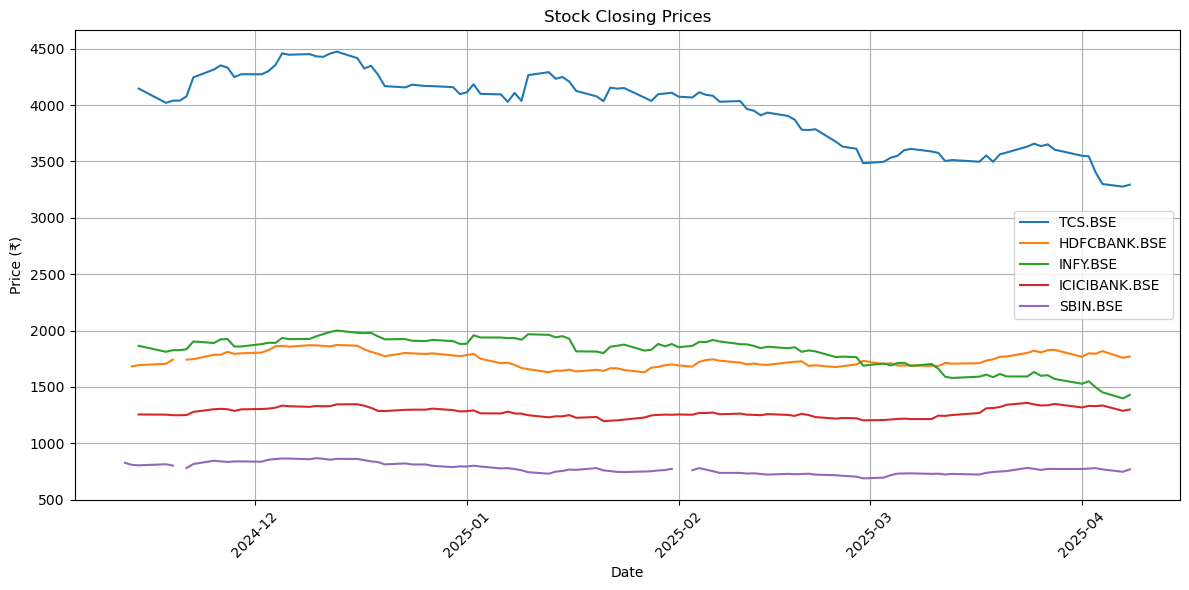


Stock Summary:
               Latest Price 1-Day Change % 7-Day Change %
TCS.BSE             3293.55          0.52%         -8.63%
HDFCBANK.BSE        1769.10          0.62%         -3.25%
INFY.BSE            1429.30          2.25%         -8.98%
ICICIBANK.BSE       1299.30          0.90%         -3.64%
SBIN.BSE             768.40          2.90%         -0.41%


In [1]:
# Simple stock data fetcher for beginners
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

# ----- Step 1: Set up your parameters -----
# List of stock symbols you want to fetch
symbols = [
    "TCS.BSE", 
    "HDFCBANK.BSE", 
    "INFY.BSE", 
    "ICICIBANK.BSE", 
    "SBIN.BSE"
]

# Your Alpha Vantage API key - replace with your actual key
api_key = "stock_api_key"

# ----- Step 2: Fetch data for each symbol -----
# Create an empty dictionary to store our results
all_data = {}

# Loop through each symbol and make API request
for symbol in symbols:
    print(f"Fetching data for {symbol}...")
    
    # API URL for this symbol
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=compact&apikey={api_key}"
    
    # Make the request
    response = requests.get(url)
    data = response.json()
    
    # Check if we got an error
    if "Error Message" in data:
        print(f"Error for {symbol}: {data['Error Message']}")
        continue
        
    # Store the data
    all_data[symbol] = data
    
    # Wait for 12 seconds to avoid hitting API limits
    time.sleep(12)  # Alpha Vantage free tier allows 5 requests per minute

# ----- Step 3: Extract the closing prices for each stock -----
closing_prices = {}

for symbol, data in all_data.items():
    # Check if we have time series data
    if "Time Series (Daily)" not in data:
        print(f"No time series data for {symbol}")
        continue
    
    # Get the time series data
    time_series = data["Time Series (Daily)"]
    
    # Extract just the closing prices
    prices = {}
    for date, values in time_series.items():
        prices[date] = float(values["4. close"])
    
    # Store in our dictionary
    closing_prices[symbol] = prices

# ----- Step 4: Create a pandas DataFrame -----
# Convert our dictionary to a more useful format
price_data = pd.DataFrame()

for symbol in closing_prices:
    # Create a series with the closing prices
    series = pd.Series(closing_prices[symbol])
    # Name the series after the symbol
    series.name = symbol
    
    # If this is our first symbol, use the series as the DataFrame
    if price_data.empty:
        price_data = pd.DataFrame(series)
    else:
        # Otherwise, join with the existing DataFrame
        price_data = price_data.join(series, how='outer')

# Convert the index to datetime and sort
price_data.index = pd.to_datetime(price_data.index)
price_data = price_data.sort_index()

# ----- Step 5: Display the data and create visualizations -----
# Show the most recent prices
print("\nMost Recent Closing Prices:")
print(price_data.tail())

# Create a simple price chart
plt.figure(figsize=(12, 6))

for symbol in price_data.columns:
    plt.plot(price_data.index, price_data[symbol], label=symbol)

plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ----- Step 6: Calculate some basic statistics -----
# Create a simple summary DataFrame
summary = pd.DataFrame(index=price_data.columns)

# Latest price
summary['Latest Price'] = price_data.iloc[-1]

# 1-day change
summary['1-Day Change %'] = (price_data.iloc[-1] / price_data.iloc[-2] - 1) * 100

# 7-day change (if we have enough data)
if len(price_data) >= 7:
    summary['7-Day Change %'] = (price_data.iloc[-1] / price_data.iloc[-7] - 1) * 100

# Format to 2 decimal places
for col in summary.columns:
    if 'Change' in col:
        summary[col] = summary[col].apply(lambda x: f"{x:.2f}%")

print("\nStock Summary:")
print(summary)

In [2]:
import requests
import pandas as pd

# API endpoint
url = 'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=INR&apikey={alpha_key}'

# Fetch data
r = requests.get(url)
data = r.json()

# Extract the 'Time Series FX (Daily)' part of the response
time_series = data.get('Time Series FX (Daily)', {})

# Convert the time series dictionary to a DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')

# Reset the index to make the date a column
df.reset_index(inplace=True)

# Rename the columns for better readability
df.rename(columns={'index': 'date'}, inplace=True)

# Convert columns to appropriate data types
df = df.astype({'1. open': 'float', '2. high': 'float', '3. low': 'float', '4. close': 'float'})

# Sort the DataFrame by date in descending order
df = df.sort_values(by='date', ascending=False)

print(df.head())

         date  1. open  2. high   3. low  4. close
0  2025-04-09  95.1047  96.0526  95.1047   95.2164
1  2025-04-08  94.5949  95.5127  94.5949   95.3502
2  2025-04-07  93.7000  94.4360  93.7000   93.6570
3  2025-04-06  93.1050  94.6590  93.1050   93.1050
4  2025-04-03  94.1120  94.5750  93.3920   94.0920


In [5]:
import requests
import pandas as pd
import psycopg
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get the database connection string and API key from .env
dbconn = os.getenv('DB_CONN')
alpha_key = os.getenv('ALPHA_KEY')

# API endpoint for EUR to INR Forex data
url = f'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=INR&apikey={alpha_key}'

# Fetch data from API
response = requests.get(url)
data = response.json()

# Extract the 'Time Series FX (Daily)' part of the response
time_series = data.get('Time Series FX (Daily)', {})

# Convert the time series dictionary to a DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')
df.reset_index(inplace=True)
df.rename(columns={
    'index': 'date',
    '1. open': 'open',
    '2. high': 'high',
    '3. low': 'low',
    '4. close': 'close'
}, inplace=True)

# Convert the date column to datetime and numeric columns to float
df['date'] = pd.to_datetime(df['date'])
df = df.astype({'open': 'float', 'high': 'float', 'low': 'float', 'close': 'float'})

# Establish database connection
with psycopg.connect(dbconn) as conn:
    with conn.cursor() as cur:
        # Create the table if it doesn't already exist
        cur.execute('''
            CREATE TABLE IF NOT EXISTS forex_data (
                date TIMESTAMP PRIMARY KEY,
                open FLOAT,
                high FLOAT,
                low FLOAT,
                close FLOAT
            );
        ''')
        conn.commit()
        
        # Remove all current data from the table
        cur.execute("TRUNCATE TABLE forex_data;")
        conn.commit()
        
        # Insert new data into the table
        for _, row in df.iterrows():
            cur.execute('''
                INSERT INTO forex_data (date, open, high, low, close)
                VALUES (%s, %s, %s, %s, %s);
            ''', (row['date'], row['open'], row['high'], row['low'], row['close']))
        
        conn.commit()

print("Data replaced successfully!")

Data replaced successfully!
